In [1]:
import pandas as pd

In [2]:
df_train= pd.read_csv('train_aWnotuB.csv')
df_test= pd.read_csv('test_BdBKkAj_L87Nc3S.csv')
df_submission= pd.read_csv('sample_submission_KVKNmI7.csv') 

<h3>Having a look at the sample set of data</h3>

In [3]:
df_train.sample(5)

,DateTime,Junction,Vehicles,ID
17226,2016-02-18 18:00:00,2,14,20160218182
32725,2016-03-27 13:00:00,3,7,20160327133
29273,2015-11-04 17:00:00,3,8,20151104173
21601,2016-08-19 01:00:00,2,13,20160819012
16813,2016-02-01 13:00:00,2,8,20160201132


In [4]:
df_test.sample(5)

,DateTime,Junction,ID
8989,2017-07-06 13:00:00,4,20170706134
3350,2017-07-17 14:00:00,2,20170717142
2524,2017-10-14 04:00:00,1,20171014041
10875,2017-09-23 03:00:00,4,20170923034
6471,2017-07-24 15:00:00,3,20170724153


<h3>Having a look at the amount of missing data</h3>

In [5]:
df_train.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [6]:
df_test.isnull().sum()

DateTime    0
Junction    0
ID          0
dtype: int64

<h3>Parsing Date</h3>

In [7]:
df_train['DateTime']= pd.to_datetime(df_train['DateTime'], format = "%Y-%m-%d %H:%M:%S")

<h3>Feature Engineering</h3>

In [8]:
df_train['Year']= df_train['DateTime'].dt.year
df_train['Month']= df_train['DateTime'].dt.month
df_train['Day']= df_train['DateTime'].dt.day
df_train['DayOfWeek']= df_train['DateTime'].dt.dayofweek
df_train['Hour']= df_train['DateTime'].dt.hour

In [9]:
df_train.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Day,DayOfWeek,Hour
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,6,0
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,6,1
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,6,2
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,6,3
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,6,4


<h3>Exploratory Data Analysis</h3>

In [10]:
import matplotlib.pyplot as plt

vehicles = df_train.Vehicles

plt.hist(vehicles, bins=5)
plt.show()

<Figure size 640x480 with 1 Axes>

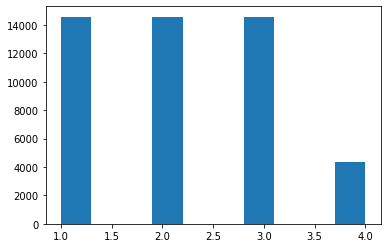

In [11]:
junction = df_train.Junction

plt.hist(junction)
plt.show()

In [12]:
df_train['Junction'].unique()

array([1, 2, 3, 4], dtype=int64)

In [13]:
dfJunction= df_train[['Junction', 'Vehicles']].groupby(['Junction']).sum().reset_index()
dfYear= df_train[['Year', 'Vehicles']].groupby(['Year']).sum().reset_index()
dfMonth= df_train[['Month', 'Vehicles']].groupby(['Month']).sum().reset_index()
dfDay= df_train[['Day', 'Vehicles']].groupby(['Day']).sum().reset_index()
dfDayofWeek= df_train[['DayOfWeek', 'Vehicles']].groupby(['DayOfWeek']).sum().reset_index()
dfHour= df_train[['Hour', 'Vehicles']].groupby(['Hour']).sum().reset_index()

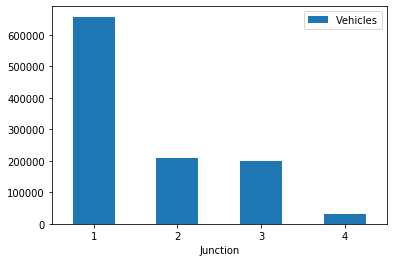

In [14]:
dfJunction.plot.bar(x='Junction', y='Vehicles', rot=0)

We have equal number of records for Junction 1, 2 and 3 and relatively lower number of records for Junction 4.
From the graph above it can be observed that there are more vehicle son Junction 1 than Junction 2 and 3. There are equal number of vehicles on unction 2 and 3 at any given time. 

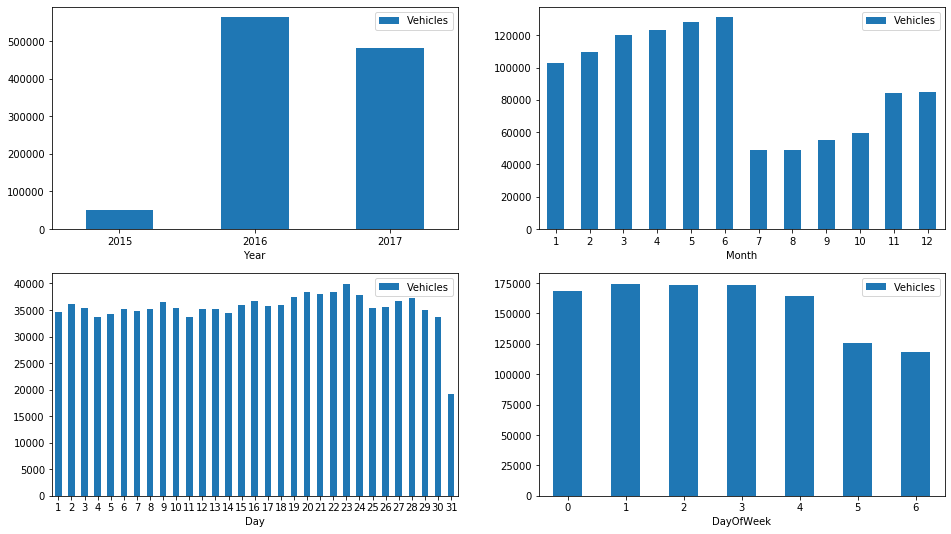

In [15]:
fig, axes = plt.subplots(figsize=(16,9),nrows=2, ncols=2)
dfYear.plot.bar(x='Year', y='Vehicles', rot=0, ax=axes[0,0])
dfMonth.plot.bar(x='Month', y='Vehicles', rot=0, ax=axes[0,1])
dfDay.plot.bar(x='Day', y='Vehicles', rot=0, ax=axes[1,0])
dfDayofWeek.plot.bar(x='DayOfWeek', y='Vehicles', rot=0, ax=axes[1,1])

1) We have data for only certain months for the year 2015 and 2017. One key observations is the the increase in amount vehicles in the year 2017. We only have half the data for 2017 and it still waual to the number of the vehicles in the whole year of 2017. The Year does not add much significance to the analysis. However we have to account for an increase in number of vehicles as it could be slightly oberved that the number of vehicles increased in 2017 

2) For 2015 and 2017, we have data available for the months of November - December and January- June respectively. Duw to the limited number of available data, we cannot make a strong prediction based on the month itself.

3) The days also do not provide a much comprehensive analysis. The number of vehicles on most days are relatively the same.

4) There can be an interesting pattern that can be observed from the days of the week. From Mondays to Fridays there are relatively higher number of vehicles on the junction than on the weekends.

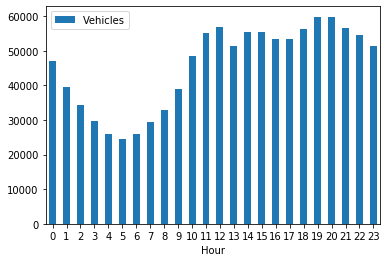

In [16]:
dfHour.plot.bar(x='Hour', y='Vehicles', rot=0)

In [17]:
df_train.describe()

,Junction,Vehicles,ID,Year,Month,Day,DayOfWeek,Hour
count,48120.000000,48120.000000,4.812000e+04,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2.180549,22.791334,2.016330e+10,2016.269825,5.884289,15.700748,2.996010,11.500000
std,0.966955,20.750063,5.944854e+06,0.616093,3.569872,8.784073,2.000017,6.922258
min,1.000000,1.000000,2.015110e+10,2015.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,9.000000,2.016042e+10,2016.000000,3.000000,8.000000,1.000000,5.750000
50%,2.000000,15.000000,2.016093e+10,2016.000000,5.000000,16.000000,3.000000,11.500000
75%,3.000000,29.000000,2.017023e+10,2017.000000,9.000000,23.000000,5.000000,17.250000
max,4.000000,180.000000,2.017063e+10,2017.000000,12.000000,31.000000,6.000000,23.000000


Test Data

In [18]:
df_test['DateTime']= pd.to_datetime(df_test['DateTime'], format = "%Y-%m-%d %H:%M:%S")

In [19]:
df_test['DayOfWeek']= df_test['DateTime'].dt.dayofweek
df_test['Hour']= df_train['DateTime'].dt.hour

In [20]:
df_test.head()

,DateTime,Junction,ID,DayOfWeek,Hour
0,2017-07-01 00:00:00,1,20170701001,5,0
1,2017-07-01 01:00:00,1,20170701011,5,1
2,2017-07-01 02:00:00,1,20170701021,5,2
3,2017-07-01 03:00:00,1,20170701031,5,3
4,2017-07-01 04:00:00,1,20170701041,5,4


In [21]:
for col in ['Junction', 'Hour', 'DayOfWeek']:
    df_train = pd.get_dummies(df_train, columns=[col])

In [22]:
for col in ['Junction', 'Hour', 'DayOfWeek']:
    df_test = pd.get_dummies(df_test, columns=[col])

In [23]:
df_train.head()

,DateTime,Vehicles,ID,Year,Month,Day,Junction_1,Junction_2,Junction_3,Junction_4,...,Hour_21,Hour_22,Hour_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,2015-11-01 00:00:00,15,20151101001,2015,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2015-11-01 01:00:00,13,20151101011,2015,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2015-11-01 02:00:00,10,20151101021,2015,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2015-11-01 03:00:00,7,20151101031,2015,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2015-11-01 04:00:00,9,20151101041,2015,11,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
df_test.head()

,DateTime,ID,Junction_1,Junction_2,Junction_3,Junction_4,Hour_0,Hour_1,Hour_2,Hour_3,...,Hour_21,Hour_22,Hour_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,2017-07-01 00:00:00,20170701001,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2017-07-01 01:00:00,20170701011,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017-07-01 02:00:00,20170701021,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,2017-07-01 03:00:00,20170701031,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2017-07-01 04:00:00,20170701041,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(df_train.drop(columns={'ID','Vehicles', 'Year', 'Month', 'Day', 'DateTime'},axis=1), np.log1p(df_train['Vehicles'])) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
x= np.expm1(reg.predict(df_test.drop(columns={'ID', 'DateTime'},axis=1)))

In [29]:
x= x*1.5

In [30]:
df_submission.Vehicles= x

In [31]:
df_submission.to_csv("clean_data.csv", index=False)

In [32]:
df_test.drop(columns={'ID', 'DateTime'},axis=1).head()

,Junction_1,Junction_2,Junction_3,Junction_4,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,...,Hour_21,Hour_22,Hour_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df_train.drop(columns={'ID','Vehicles', 'Year', 'Month', 'Day', 'DateTime'},axis=1).head()

,Junction_1,Junction_2,Junction_3,Junction_4,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,...,Hour_21,Hour_22,Hour_23,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_submission.head()

,ID,Vehicles
0,20170701001,54.084652
1,20170701011,45.180724
2,20170701021,39.641571
3,20170701031,34.492346
4,20170701041,30.746596


Having a look at the test data